<a href="https://colab.research.google.com/github/M4sum/sarcasm-what-/blob/master/sarcastic-headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import nltk
import spacy
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import re
import os
import pickle
print(os.listdir("Sarcasm_Headlines_Dataset"))

['Sarcasm_Headlines_Dataset.json']


In [0]:
news_data_unsorted = pd.read_json(r'D://dontDelete//myWork/nlp//Sarcasm_Headlines_Dataset/Sarcasm_Headlines_Dataset.json',lines = True)
print(len(news_data_unsorted))
news_data = news_data_unsorted.sort_values(['is_sarcastic'], ascending = True)
news_data = news_data.reset_index(drop=True)

26709


In [0]:
# Filtering word list
spacy.load('en_core_web_sm')
quotes = spacy.lang.punctuation.LIST_QUOTES
punct = spacy.lang.punctuation.LIST_PUNCT
stop_words = stopwords.words("english")
num=['0','1','2','3','4','5','6','7','8','9','&','-','',"'","--"]
trunc_elements = num + stop_words + punct + quotes
trunc = num + punct + quotes
all_words = []
al_words =[]
def get_words(sentence):
    words = []
    sentence =re.split(',| ', sentence)
    words.append(sentence)
    return list(words)

for sentence in news_data['headline']:
    words = get_words(sentence)
    for i in words:
        for j in i:
            if j not in trunc:
                al_words.append(j.lower())
            if j not in trunc_elements:
                all_words.append(j.lower())
print("Truncated Elements: ",len(trunc_elements))
print("Remaining Words: ",len(all_words))
print(len(al_words))
word_freq = nltk.FreqDist(all_words)
unique_words = []
for word in all_words:
    if word not in unique_words:
        unique_words.append(word)
print('unique_words: ',len(unique_words))
print('friends: ',word_freq['friends'])

NameError: name 'news_data' is not defined

NO.of 0:  14985
1


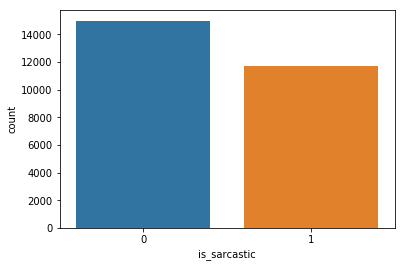

In [0]:
#news_data = news_data.drop("article_link",1)
for i in range(len(news_data)):
    if news_data['is_sarcastic'][i] == 1:
        print('NO.of 0: ',i)
        break
print(news_data['is_sarcastic'][15000])
sns.countplot(news_data['is_sarcastic'])

In [0]:
#Generate bigrams and trigrams
def generate_ngrams(text, n):
    ngrams = zip(*[text[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]
bigrams = generate_ngrams(list(all_words), 2)
trigrams = generate_ngrams(list(all_words), 3)
print("Total bigrams: ",len(bigrams))
print("Total trigrams: ",len(trigrams))

Total bigrams:  189508
Total trigrams:  189507


In [0]:
#calculating frequecy of bigrams ***This takes very long to process***
from collections import defaultdict
bigram_freq = defaultdict(int)
bigram_freq_f = open("bigram_freq.pickle","rb")
bigram_freq = pickle.load(bigram_freq_f)
bigram_freq_f.close()
'''for bigram in bigrams:
    for sent in news_data['headline']:
        if bigram in sent:
            bigram_freq[bigram]+=1'''
print(len(bigram_freq))

#save_bigram_freq = open("bigram_freq.pickle","wb")
#pickle.dump(bigram_freq, save_bigram_freq)
#save_bigram_freq.close()

90057


In [0]:
#calculating frequecy of trigrams ***This takes very long to process***
from collections import defaultdict
trigram_freq = defaultdict(int)
trigram_freq_f = open("trigram_freq.pickle","rb")
trigram_freq = pickle.load(trigram_freq_f)
trigram_freq_f.close()
'''for trigram in trigrams:
    for sent in news_data['headline']:
        if trigram in sent:
            trigram_freq[trigram]+=1'''
print(len(trigram_freq))

#save_trigram_freq = open("trigram_freq.pickle","wb")
#pickle.dump(trigram_freq, save_trigram_freq)
#save_trigram_freq.close()

55689


Total Unique Bigrams:  90057


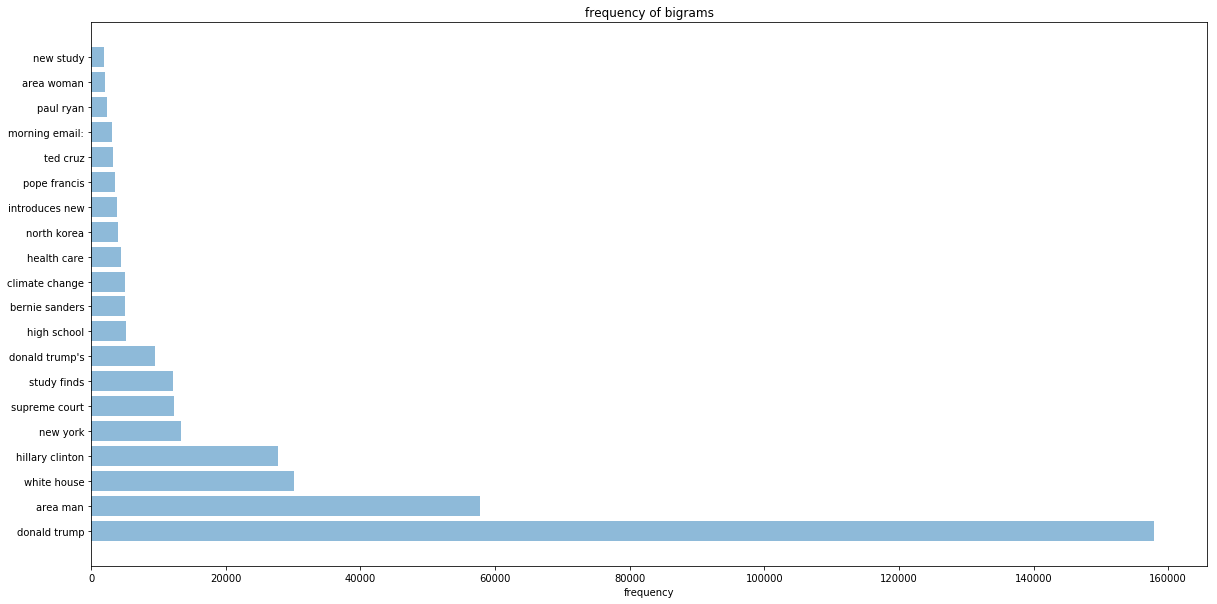

In [0]:
#Plot bigram frequencies
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda v: v[1], reverse = True)
phrases = []
freq = []
for x in range(len(sorted_bigram_freq)):
    phrases.append(sorted_bigram_freq[x][0])
    freq.append(sorted_bigram_freq[x][1])
phrases = phrases[:20]
freq = freq[:20]
y_pos = np.arange(len(phrases))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.barh(y_pos, freq, align='center', alpha=0.5)
plt.yticks(y_pos, phrases)
plt.xlabel('frequency')
plt.title('frequency of bigrams')
plt.show()

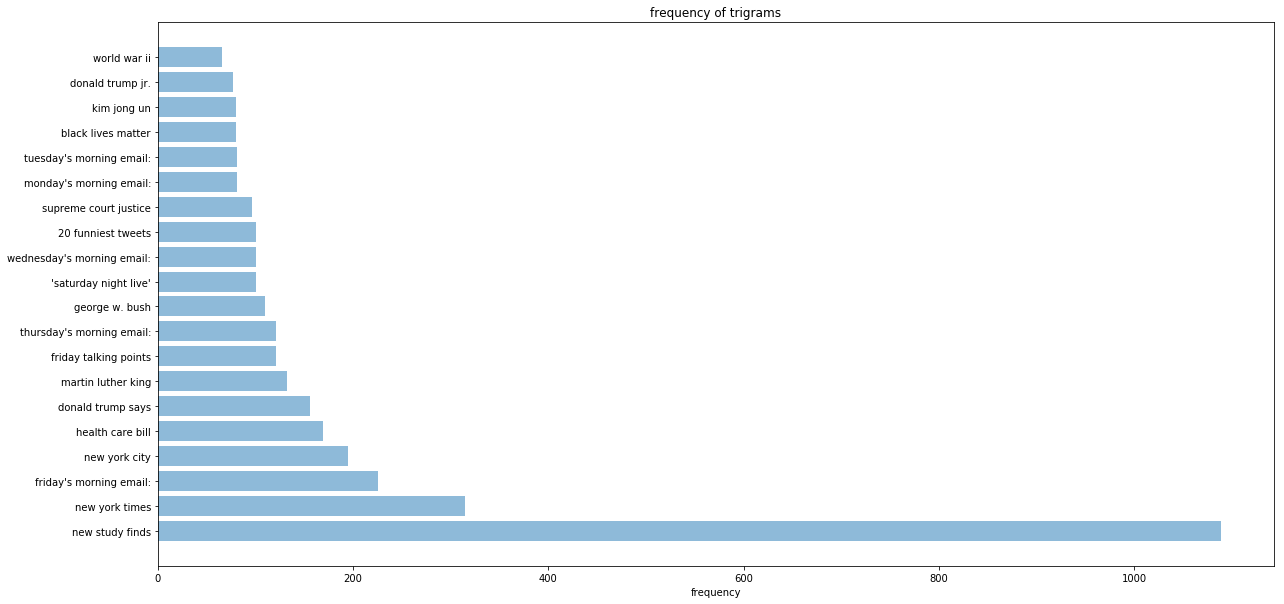

In [0]:
#Plot trigram frequencies
sorted_trigram_freq = sorted(trigram_freq.items(), key=lambda v: v[1], reverse = True)
phrases = []
freq = []
for x in range(len(sorted_trigram_freq)):
    phrases.append(sorted_trigram_freq[x][0])
    freq.append(sorted_trigram_freq[x][1])
phrases = phrases[:20]
freq = freq[:20]
y_pos = np.arange(len(phrases))
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.barh(y_pos, freq, align='center', alpha=0.5)
plt.yticks(y_pos, phrases)
plt.xlabel('frequency')
plt.title('frequency of trigrams')
plt.show()

In [0]:
phrase = 'study:'
for sent in news_data['headline']:
    if phrase in sent:
        print(sent)


In [0]:
def find_features(headline, feature_set):
    features ={}
    for w in feature_set:
        features[w] = (w in headline)
    return features

In [0]:
#words as features for nltk naiveBayes
word_features = dict(sorted(list(word_freq.items()), key = lambda v: v[1], reverse = True)[:5000]).keys()
#bigrams as features
#bigram_features = dict(sorted(list(bigram_freq.items()), key = lambda v: v[1], reverse = True)[:500]).keys()
#trigrams as features
#trigram_features = dict(sorted(list(trigram_freq.items()), key = lambda v: v[1], reverse = True)[:500]).keys()


feature_sets = [(find_features(news_data_unsorted['headline'][x], word_features),news_data_unsorted['is_sarcastic'][x]) for x in range(0,news_data_unsorted['headline'].size)]
#print(find_features(news_data['headline']))

training_set = feature_sets[6000:]
testing_set = feature_sets[:6000]



In [0]:
from  nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
#SGDClassifier
SGDClassifier = SklearnClassifier(SGDClassifier(loss = 'modified_huber', max_iter = 1000, tol = None))
SGDClassifier.train(training_set)
print('SGDClassifier accuracy: ', (nltk.classify.accuracy(SGDClassifier, testing_set))*100)

C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier accuracy:  79.21666666666667


In [0]:
#NaiveBayes
NaiveBayesClassifier = nltk.NaiveBayesClassifier.train(training_set)
#NaiveBayesClassifier_f = open("naivebayes.pickle","rb")
#NaiveBayesClassifier = pickle.load(NaiveBayesClassifier_f)
#NaiveBayesClassifier_f.close()
print('Naive Bayes Accuacy: ', (nltk.classify.accuracy(NaiveBayesClassifier, testing_set))*100)
NaiveBayesClassifier.show_most_informative_features(30)
#save_naivebayes = open("naivebayes.pickle","wb")
#pickle.dump(NaiveBayesClassifier, save_naivebayes)
#save_naivebayes.close()

#MultinomialNB
MultinomialNB = SklearnClassifier(MultinomialNB())
MultinomialNB.train(training_set)
print('MultinomialNB accuracy: ', (nltk.classify.accuracy(MultinomialNB, testing_set))*100)

#BernoulliNB
BernoulliNB = SklearnClassifier(BernoulliNB())
BernoulliNB.train(training_set)
print('BernoulliNB accuracy: ', (nltk.classify.accuracy(BernoulliNB, testing_set))*100)

#LogisticRegression
LogisticRegression = SklearnClassifier(LogisticRegression())
LogisticRegression.train(training_set)
print('LogisticRegression accuracy: ', (nltk.classify.accuracy(LogisticRegression, testing_set))*100)



#LinearSVC
LinearSVC = SklearnClassifier(LinearSVC())
LinearSVC.train(training_set)
print('LinearSVC accuracy: ', (nltk.classify.accuracy(LinearSVC, testing_set))*100)

#NuSVC
NuSVC = SklearnClassifier(NuSVC())
NuSVC.train(training_set)
print('NuSVC accuracy: ', (nltk.classify.accuracy(NuSVC, testing_set))*100)

Naive Bayes Accuacy:  79.45
Most Informative Features
                coworker = True                1 : 0      =     56.7 : 1.0
               recommend = True                1 : 0      =     35.4 : 1.0
                    area = True                1 : 0      =     32.9 : 1.0
               apartment = True                1 : 0      =     32.8 : 1.0
                  hoping = True                1 : 0      =     31.1 : 1.0
                  study: = True                1 : 0      =     30.9 : 1.0
               wondering = True                1 : 0      =     24.3 : 1.0
                    2015 = True                0 : 1      =     24.2 : 1.0
                    desk = True                1 : 0      =     22.6 : 1.0
                 assures = True                1 : 0      =     20.9 : 1.0
                previous = True                1 : 0      =     20.0 : 1.0
              introduces = True                1 : 0      =     19.9 : 1.0
                    shit = True               

C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression accuracy:  80.10000000000001
LinearSVC accuracy:  78.71666666666667


C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC accuracy:  79.66666666666666


In [0]:
#Voted Classifier from above classifiers
from nltk.classify import ClassifierI
from statistics import mode

class vote_classifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self,features):
        votes = []
        for classifier in self._classifiers:
            vote = classifier.classify(features)
            votes.append(vote)
        return mode(votes)

    def conf(self,features):
        votes = []
        for classifier in self._classifiers:
            vote = classifier.classify(features)
            votes.append(vote)
        
        max_vote = votes.count(mode(votes))
        conf = max_vote / len(votes)
        return conf
            
voted_classifier = vote_classifier(NaiveBayesClassifier,MultinomialNB,BernoulliNB,LogisticRegression,SGDClassifier,LinearSVC,NuSVC)
#save_voted_classifier_f = open("voted_classifier.pickle","rb")
#voted_classifier = pickle.load(save_voted_classifier_f)
#save_voted_classifier_f.close()

print('voted_classifier accuracy: ', (nltk.classify.accuracy(voted_classifier, testing_set))*100)

voted_classifier accuracy:  80.43333333333334


In [0]:
avg_conf = 0
max_conf = 0
min_conf = 100
for i in range(len(testing_set)):
    avg_conf+=voted_classifier.conf(testing_set[i][0])
    if voted_classifier.conf(testing_set[i][0])>max_conf:
        max_conf = voted_classifier.conf(testing_set[i][0])
    if min_conf>voted_classifier.conf(testing_set[i][0]):
        min_conf = voted_classifier.conf(testing_set[i][0])
avg_conf = avg_conf/len(testing_set)
print("Avg. Confidence: ",avg_conf*100, "\nMax Confidence: ", max_conf*100, "Min Confidence: ", min_conf*100)

Avg. Confidence:  92.82857142857031 
Max Confidence:  100.0 Min Confidence:  57.14285714285714


In [0]:
voted_classification = []
for x in range(len(testing_set)):
    if voted_classifier.classify(testing_set[x][0]) ==1:
        voted_classification.append(1)
    else:
        voted_classification.append(0)

In [0]:
total_sar = sum(x.count(1) for x in testing_set)
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(testing_set)):
    if voted_classification[i] == news_data_unsorted['is_sarcastic'][i] == 1:
        tp += 1
    elif news_data_unsorted['is_sarcastic'][i] == 1 and voted_classification[i] != news_data_unsorted['is_sarcastic'][i]:
        fn += 1
    elif news_data_unsorted['is_sarcastic'][i] == 0 and voted_classification[i] != news_data_unsorted['is_sarcastic'][i]:
        fp += 1
    else:
        tn +=1
#print(tp,tn,fp,fn)
precision = tp / (tp+fp)
recall = tp / (tp + fn)
print("Prescision: ",precision*100," Recall: ",recall*100)

Prescision:  79.24  Recall:  75.15174506828528
